In [304]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

# 1. 데이터 살펴보기
- 시계열 기반의 주식 데이터
- Symbol : 주식을 식별할 변수
- 2018-06-1 - 2020-09-18 까지의 주식 가격 존재
- 총 2274개의 주식 식별 변수 존재

In [31]:
df = pandas.read_csv("stock.adj_close.csv")
df

,Symbol,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
1,A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
2,A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
3,A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
4,A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,...,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,8010.0,8010.0
2270,A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,...,4040.0,4050.0,4245.0,4275.0,4200.0,4195.0,4070.0,4045.0,4015.0,4055.0
2271,A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13200.0,13150.0,13100.0,13150.0,13100.0,13900.0,13250.0,13350.0,13550.0,13450.0
2272,A950190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32200.0,31200.0,30400.0,30500.0,30150.0,30050.0,31450.0,31750.0,31200.0,30350.0


### 데이터 변수 타입 확인
- Symbol : object(1)
- 2018-06-1 - 2020-09-18 : float64(568)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 569 entries, Symbol to 2020-09-18
dtypes: float64(568), object(1)
memory usage: 9.9+ MB


### 데이터 기초 통계값 출력

In [25]:
df.describe()

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
count,1.996000e+03,2.001000e+03,2.001000e+03,2.003000e+03,2.003000e+03,2.004000e+03,2.004000e+03,2.007000e+03,2.007000e+03,2.008000e+03,...,2.266000e+03,2.266000e+03,2.266000e+03,2.266000e+03,2.267000e+03,2.268000e+03,2.268000e+03,2.269000e+03,2.272000e+03,2.274000e+03
mean,2.542655e+04,2.545105e+04,2.548425e+04,2.587258e+04,2.568289e+04,2.589635e+04,2.589912e+04,2.551966e+04,2.543263e+04,2.494160e+04,...,2.220101e+04,2.216181e+04,2.194550e+04,2.224706e+04,2.229008e+04,2.251276e+04,2.262822e+04,2.251180e+04,2.224516e+04,2.232786e+04
std,7.208048e+04,7.221487e+04,7.246320e+04,7.400352e+04,7.319099e+04,7.465503e+04,7.503456e+04,7.412334e+04,7.345275e+04,7.249892e+04,...,6.089074e+04,6.107882e+04,6.046127e+04,6.133683e+04,6.106918e+04,6.139509e+04,6.179946e+04,6.122330e+04,6.054663e+04,6.091111e+04
min,2.530000e+02,2.550000e+02,2.550000e+02,2.650000e+02,2.580000e+02,2.590000e+02,2.540000e+02,2.490000e+02,2.500000e+02,2.400000e+02,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
25%,3.472500e+03,3.465000e+03,3.495000e+03,3.540000e+03,3.542500e+03,3.503750e+03,3.458000e+03,3.380000e+03,3.395000e+03,3.298750e+03,...,2.556250e+03,2.525000e+03,2.514250e+03,2.547500e+03,2.560000e+03,2.588750e+03,2.650000e+03,2.625000e+03,2.598750e+03,2.607500e+03
50%,7.395000e+03,7.470000e+03,7.461000e+03,7.510000e+03,7.510000e+03,7.502000e+03,7.461500e+03,7.330000e+03,7.320000e+03,7.200000e+03,...,6.475000e+03,6.535000e+03,6.475000e+03,6.600000e+03,6.680000e+03,6.800000e+03,6.830000e+03,6.770000e+03,6.710000e+03,6.715000e+03
75%,1.823400e+04,1.805000e+04,1.840000e+04,1.849200e+04,1.847400e+04,1.851000e+04,1.833575e+04,1.795100e+04,1.810000e+04,1.751250e+04,...,1.855000e+04,1.833750e+04,1.815000e+04,1.850000e+04,1.845000e+04,1.866250e+04,1.871250e+04,1.860000e+04,1.827500e+04,1.837500e+04
max,1.385000e+06,1.362000e+06,1.381000e+06,1.420000e+06,1.392000e+06,1.411000e+06,1.437000e+06,1.441000e+06,1.423000e+06,1.436000e+06,...,1.475000e+06,1.493000e+06,1.510000e+06,1.527000e+06,1.518000e+06,1.519000e+06,1.533000e+06,1.506000e+06,1.508000e+06,1.516000e+06


# 2. 데이터 클렌징
- 1) 인덱스 설정
- 2) 결측치 처리
- 3) 데이터 타입 변경

### 1. 주식 식별 변수를 인덱스로 설정

In [32]:
df = df.set_index('Symbol')
df.head(5)

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0


### 2. 결측치 확인
- 주식시장에 상장한 시점이 회사마다 다르기 때문에 과거데이터부터 다수의 결측치가 존재하는 것을 확인할 수 있음.

In [33]:
df.isnull().sum()

2018-06-01    278
2018-06-04    273
2018-06-05    273
2018-06-07    271
2018-06-08    271
             ... 
2020-09-14      6
2020-09-15      6
2020-09-16      5
2020-09-17      2
2020-09-18      0
Length: 568, dtype: int64

### 2-1. 결측치 처리 
- ( .fillna(method = 'bfill') ) 함수를 이용하여 상장시점의 가격으로 결측치를 채워줌(시계열 분석의 편의를 위해)
- 예를들어, 상장시점의 가격(38500) -> 2018-06-01의 가격(38500)

In [35]:
df.T.fillna(method='bfill',inplace=True)
df

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,9540.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,4040.0,4050.0,4245.0,4275.0,4200.0,4195.0,4070.0,4045.0,4015.0,4055.0
A950180,38450.0,38450.0,38450.0,38450.0,38450.0,38450.0,38450.0,38450.0,38450.0,38450.0,...,13200.0,13150.0,13100.0,13150.0,13100.0,13900.0,13250.0,13350.0,13550.0,13450.0


In [38]:
# 결측치 처리 확인
df.isnull().sum()

2018-06-01    0
2018-06-04    0
2018-06-05    0
2018-06-07    0
2018-06-08    0
             ..
2020-09-14    0
2020-09-15    0
2020-09-16    0
2020-09-17    0
2020-09-18    0
Length: 568, dtype: int64

### 3. 시계열 분석의 용이를 위해 칼럼을 datetime 데이터 타입으로 변환

In [39]:
df.columns = pandas.to_datetime(df.columns)
df.columns

DatetimeIndex(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07',
               '2018-06-08', '2018-06-11', '2018-06-12', '2018-06-14',
               '2018-06-15', '2018-06-18',
               ...
               '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10',
               '2020-09-11', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18'],
              dtype='datetime64[ns]', length=568, freq=None)

In [40]:
# 데이터 타입 변경 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2274 entries, A000020 to A950200
Columns: 568 entries, 2018-06-01 to 2020-09-18
dtypes: float64(568)
memory usage: 9.9+ MB


# 3. 분석주제(가설) 설정
## **코로나19 팬데믹으로 인해 2020년 주식시장이 침체되었을 것이다.**

### 1. 전체적인 주식시장 그래프 시각화 

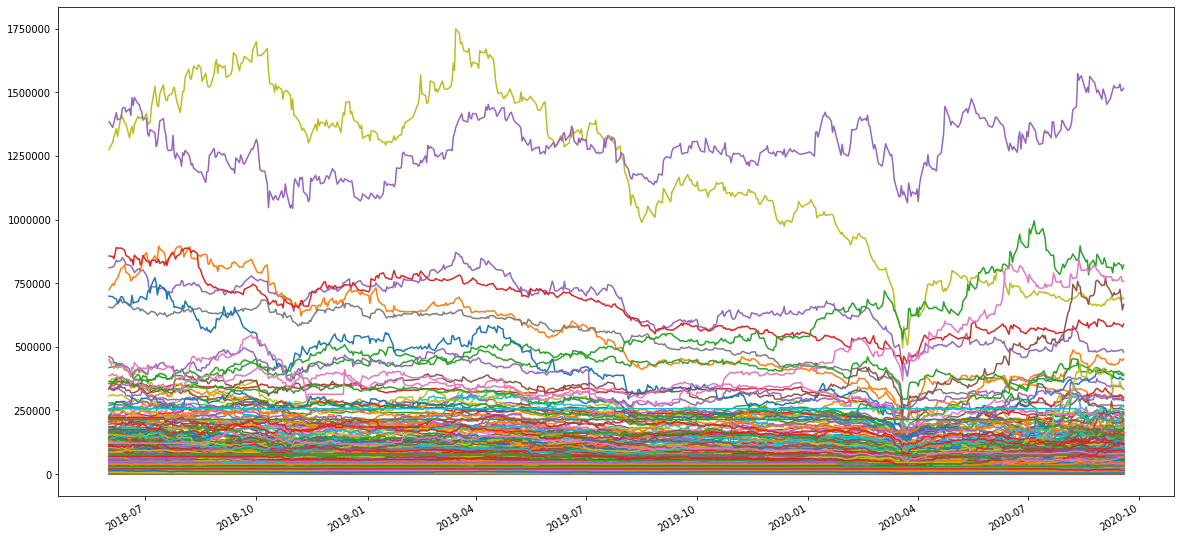

In [41]:
df.T.plot(figsize=(20,10), legend=False)

- 전체적인 시각화를 통한 주식시장 동향을 파악할 수 있다.
- 눈에 띄는 시점은 2020-02 ~ 2020-03 쯤으로 주식들이 전체적으로 폭락한 것을 볼 수 있다.
- 실제로 검색을 통해 해당 기간 코스피 주가가 대폭락한 것을 알 수 있다.


* 이미지 출처 : 위키트리

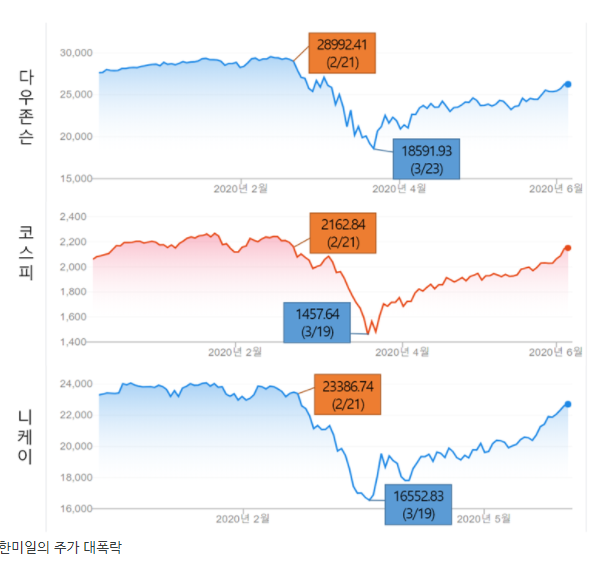

### 2. 2020년 1월부터 3월까지의 하락세 시각화(평균을 대푯값으로 사용)
- **1월 주식 평균과 3월의 주식 평균을 비교해보고 얼마만큼 폭락했는지 수치로 파악**

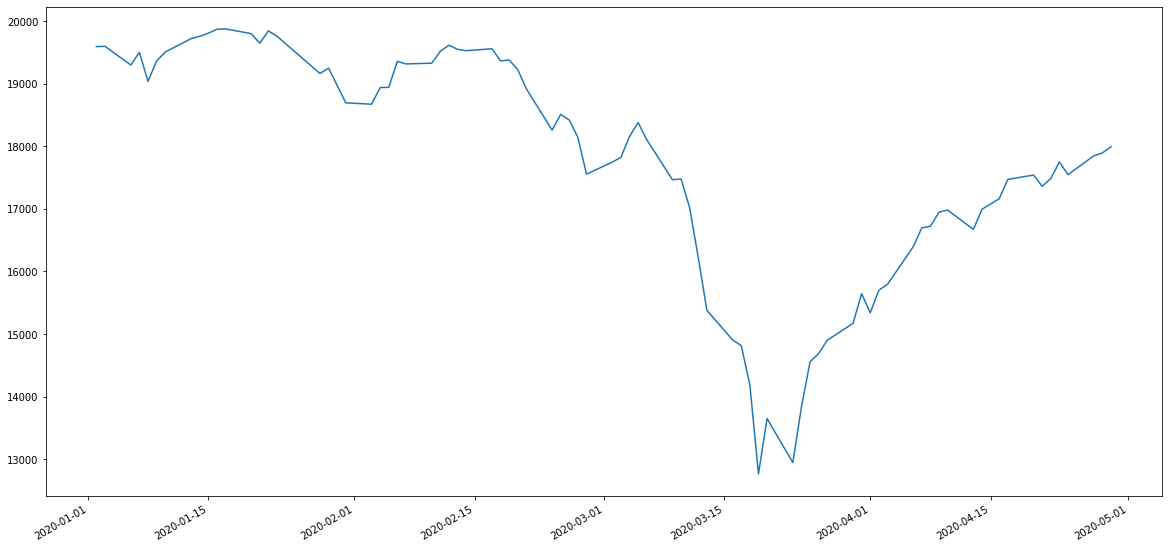

In [244]:
df.T['2020-01':'2020-04'].T.mean().plot(figsize=(20,10))

In [246]:
print('2020년 1월 주식시장 평균 :',round(df.T['2020-01'].T.mean().mean(),2),'원')
print('2020년 3월 주식시장 평균 :',round(df.T['2020-03'].T.mean().mean(),2),'원')
print('2달동안',round((100 - (df.T['2020-03'].T.mean().mean() / df.T['2020-01'].T.mean().mean() * 100)),2),'% 감소')

2020년 1월 주식시장 평균 : 19501.16 원
2020년 3월 주식시장 평균 : 15718.06 원
2달동안 19.4 % 감소


### -> 팬데믹이 시작된 시점과 맞물려 주가가 폭락한 것을 알 수 있음
###  **2달 사이에 19.4% 감소**

### 3. 2019년 1월부터 2020년 9월까지의 주식시장 그래프(평균을 대푯값으로 사용)
- 2019년에 비해 2020년에 얼마만큼 감소했는지 분석

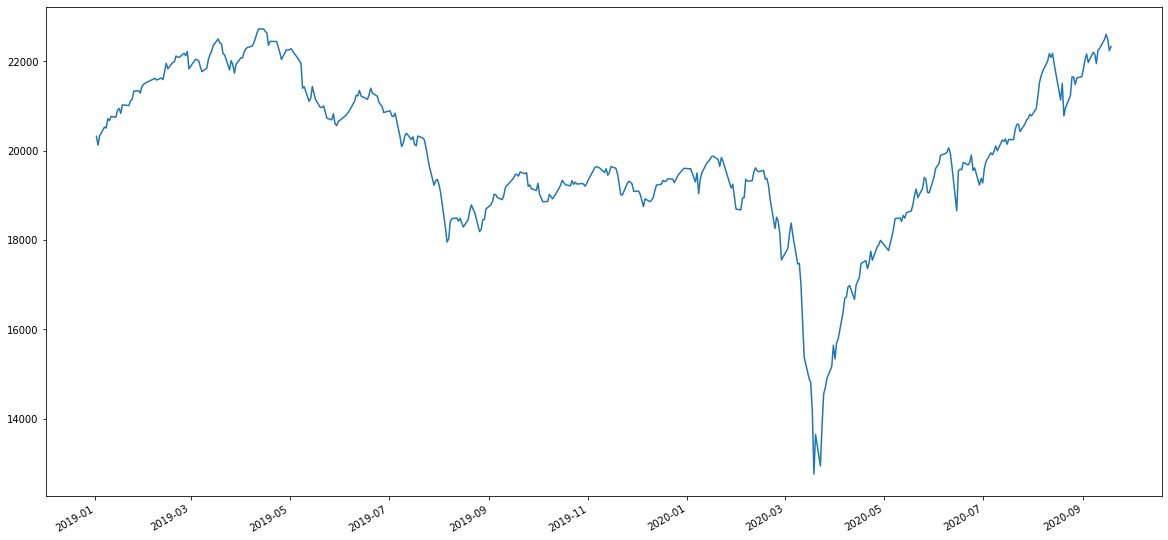

In [242]:
df.T['2019':'2020'].T.mean().plot(figsize=(20,10))

In [243]:
print('2019년 주식시장 평균 :',round(df.T['2019'].T.mean().mean(),2),'원')
print('2020년 주식시장 평균 :',round(df.T['2020'].T.mean().mean(),2),'원')
print('1년 사이에',round((100 - (df.T['2020'].T.mean().mean() / df.T['2019'].T.mean().mean() * 100)),2),'% 감소')

2019년 주식시장 평균 : 20415.21 원
2020년 주식시장 평균 : 19174.37 원
1년 사이에 6.08 % 감소


### -> 코로나19의 영향으로 1년 사이에 6.08% 감소

# 4. 분석결과 및 가설 검증

- ## 1) 코로나19 팬데믹 선언 시점과 맞물려 주가 폭락
- ## 2) 3월에는 1월 대비 주가가 19.4%나 감소
- ## 3) 2019년 대비 2020년 주가는 6.08% 감소 
- ## 4) 하지만 4월 이후 다시 상승세를 보이며 주가 회복 중

# 5. 기타 EDA
- 가장 최근인 2020-09-18 기준 가장 비싼 주식 TOP10은 무엇일까?
- 상장 시점부터 주가 상승률이 가장 큰 주식 TOP10은 무엇일까?
- 가장 많이 하락한 주식 TOP10은 무엇일까?

### 1. 가장 비싼 주식 TOP10 확인

In [270]:
df['2020-09-18'].sort_values(ascending=False)[:10]

Symbol
A051900    1516000.0
A036570     821000.0
A207940     758000.0
A003240     688000.0
A051910     666000.0
A007310     589000.0
A000670     479000.0
A006400     453000.0
A010130     392000.0
A097950     387000.0
Name: 2020-09-18 00:00:00, dtype: float64

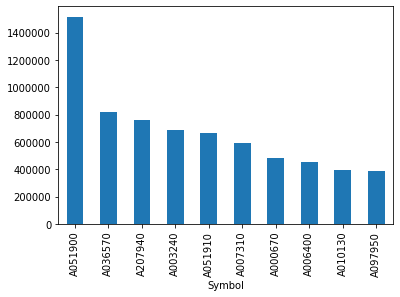

In [272]:
df['2020-09-18'].sort_values(ascending=False)[:10].plot(kind='bar')

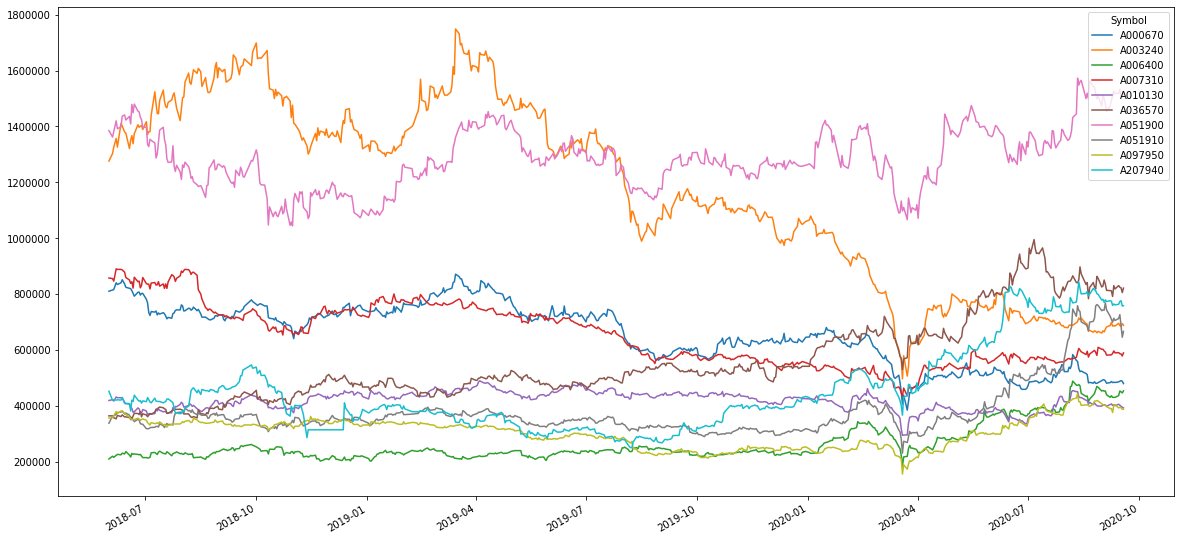

In [271]:
high = df['2020-09-18']>380000
df[high].T.plot(figsize=(20,10))

- 1등 : A051900,  1516000원
- 2등 : A036570,    821000원
- 3등 : A207940,    758000원
- 4등 : A003240,    688000원
- 5등 : A051910,    666000원
- 6등 : A007310,    589000원
- 7등 : A000670,    479000원
- 8등 : A006400.    453000원
- 9등 : A010130,    392000원
- 10등 : A097950,    387000원

### 2. 가장 상승률이 큰 주식 TOP10 확인

In [306]:
ndf2 = df['2018-06-01'] # 상장시점
ndf3 = df['2020-09-18'] # 가장 최근 시점
print(ndf2,ndf3)

Symbol
A000020    11550.0
A000030    15500.0
A000040     2992.0
A000050    13200.0
A000060    20050.0
            ...   
A950160    38600.0
A950170    13850.0
A950180    38450.0
A950190    28750.0
A950200    20400.0
Name: 2018-06-01 00:00:00, Length: 2274, dtype: float64 Symbol
A000020    25050.0
A000030    14800.0
A000040      796.0
A000050    10750.0
A000060    13200.0
            ...   
A950160     8010.0
A950170     4055.0
A950180    13450.0
A950190    30350.0
A950200    14550.0
Name: 2020-09-18 00:00:00, Length: 2274, dtype: float64


In [307]:
# 상승률 계산
ndf4 = (ndf3-ndf2)/ndf2 * 100 

In [318]:
ndf5=pandas.DataFrame(ndf4)
ndf5

,0
Symbol,
A000020,116.883117
A000030,-4.516129
A000040,-73.395722
A000050,-18.560606
A000060,-34.164589
...,...
A950160,-79.248705
A950170,-70.722022
A950180,-65.019506


In [323]:
# 상승률 TOP10 추출
ndf5[0].sort_values(ascending=False)[:10]

Symbol
A101360    4662.376238
A019170    2205.005821
A196170    1185.894207
A101490     934.324943
A096530     744.800000
A138080     659.995198
A268600     640.753425
A336260     615.083799
A131370     603.862661
A051160     589.473684
Name: 0, dtype: float64

In [338]:
# 그래프 그리기 위해 Top10 추출
high2 = df.loc[['A101360','A019170','A196170','A101490','A096530','A138080','A268600','A336260','A131370','A051160']]
high2

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
Symbol,,,,,,,,,,,,,,,,,,,,,
A101360,505.0,579.0,660.0,562.0,602.0,605.0,691.0,706.0,735.0,669.0,...,28100.0,28200.0,26600.0,26750.0,26400.0,26650.0,26200.0,25050.0,25000.0,24050.0
A019170,8590.0,8460.0,8480.0,8910.0,8600.0,8480.0,8480.0,8160.0,8180.0,7980.0,...,148500.0,140000.0,139500.0,141000.0,153500.0,146500.0,146500.0,154000.0,152500.0,198000.0
A196170,15880.0,15930.0,15480.0,16005.0,15555.0,15030.0,14605.0,14080.0,14330.0,14330.0,...,214600.0,208700.0,200300.0,203000.0,202500.0,201700.0,211900.0,215200.0,204900.0,204200.0
A101490,4370.0,4380.0,4405.0,4400.0,4320.0,4215.0,4240.0,4165.0,4165.0,4005.0,...,42400.0,42800.0,40100.0,42000.0,41650.0,41550.0,43200.0,43850.0,44050.0,45200.0
A096530,31250.0,31250.0,31100.0,31300.0,31150.0,31550.0,31700.0,31600.0,31650.0,30000.0,...,244000.0,247000.0,242100.0,251100.0,249500.0,250000.0,253200.0,267700.0,269200.0,264000.0
A138080,8329.0,8172.0,8251.0,8329.0,8368.0,8329.0,8251.0,8212.0,8133.0,7789.0,...,67000.0,65200.0,65700.0,66600.0,65800.0,65400.0,66000.0,64500.0,63000.0,63300.0
A268600,29200.0,29200.0,29200.0,29200.0,29200.0,29200.0,29200.0,29200.0,29200.0,29200.0,...,232500.0,219100.0,200800.0,200000.0,202200.0,202500.0,198400.0,205100.0,201900.0,216300.0
A336260,7160.0,7160.0,7160.0,7160.0,7160.0,7160.0,7160.0,7160.0,7160.0,7160.0,...,59300.0,56400.0,52800.0,53300.0,52300.0,54300.0,53000.0,52900.0,53500.0,51200.0
A131370,2330.0,2340.0,2350.0,2350.0,2360.0,2365.0,2330.0,2260.0,2210.0,2200.0,...,18550.0,17150.0,17550.0,16850.0,17150.0,16600.0,17100.0,16550.0,16800.0,16400.0


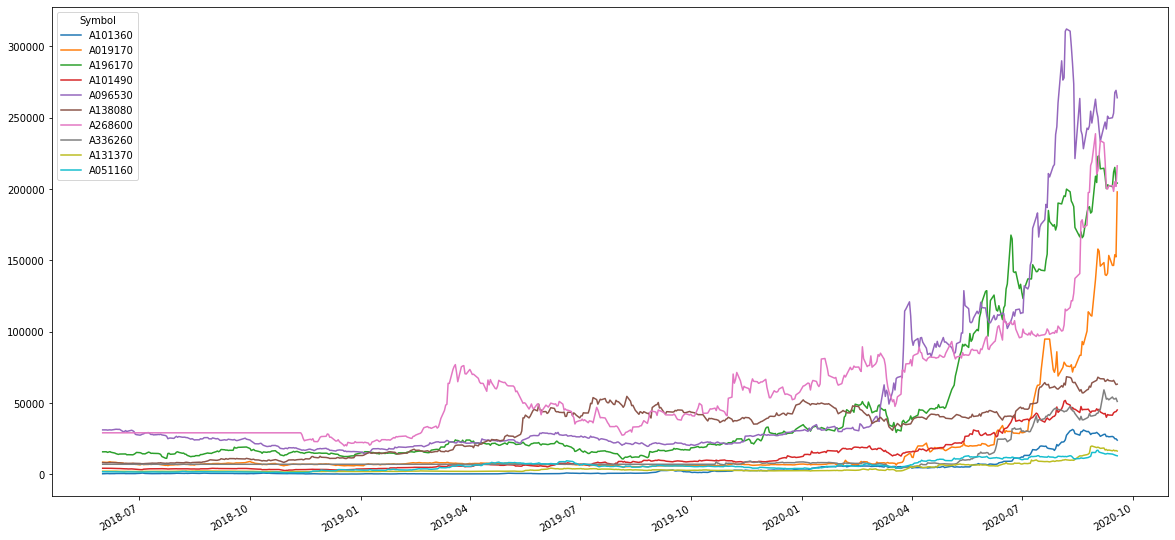

In [342]:
high2.T.plot(figsize=(20,10))

- 1등 : A101360,    4662.376238 % 상승
- 2등 : A019170,    2205.005821 % 상승
- 3등 : A196170,    1185.894207 % 상승
- 4등 : A101490,     934.324943 % 상승
- 5등 : A096530,     744.800000 % 상승
- 6등 : A138080,     659.995198 % 상승
- 7등 : A268600,     640.753425 % 상승
- 8등 : A336260,     615.083799 % 상승
- 9등 : A131370,     603.862661 % 상승
- 10등 : A051160,     589.473684 % 상승


-> 이곳에 투자합시다..

### 3. 가장 많이 하락한 주식 TOP10 확인

In [347]:
# 하락율 TOP10 추출
ndf5[0].sort_values(ascending=True)[:10]

Symbol
A197210   -99.798280
A030270   -99.639896
A054340   -99.620130
A204990   -99.515478
A065940   -99.282371
A103130   -98.992248
A123260   -98.959538
A017680   -98.908098
A094190   -98.876404
A900040   -98.469388
Name: 0, dtype: float64

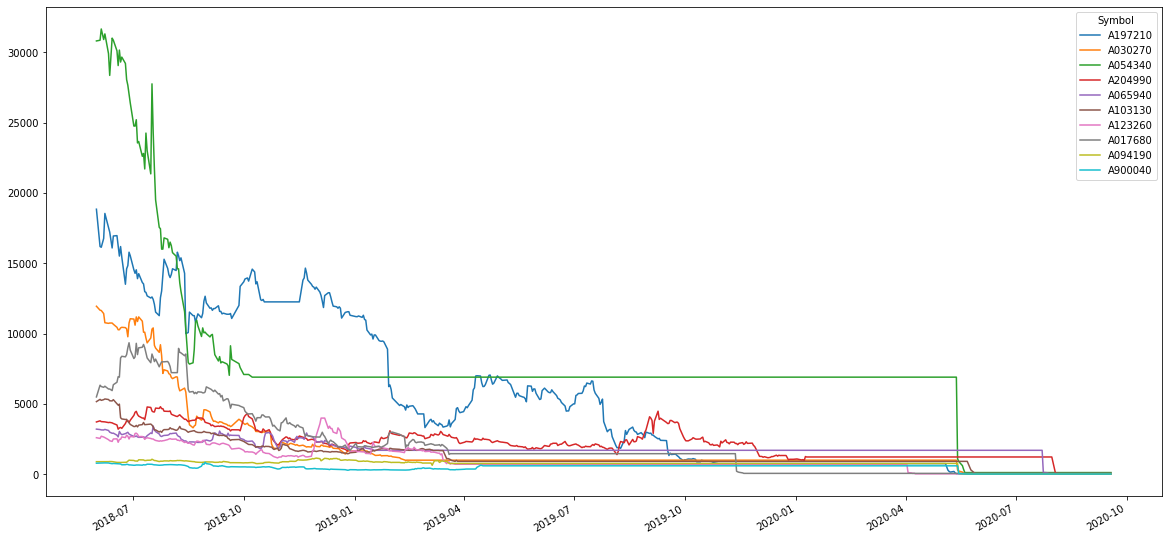

In [344]:
# 그래프 그리기 위해 Top10 추출
high2 = df.loc[['A197210','A030270','A054340','A204990','A065940','A103130','A123260','A017680','A094190','A900040']]
high2.T.plot(figsize=(20,10))

### TOP10 회사들의 주식은 모두 성장률이 마이너스(-)를 기록했고, 대부분 주식시장에서 물러난 상태로 분석됨